# Análisis de Datos Hackathon Paz
-----

A continuación se encuentra un análisis de datos realizado con más de **Treintamil** (30.000) datos recolectados por medio de cuatro diferentes bases de datos de organizaciones sociales, datospublicos.gov, FLIP y el Centro Nacional De Memoria Historica comprendidos entre los años de 1970 al 2022.
 

# New Section

In [ ]:
# Libraries

# Download information
!pip install -U geopandas 
!gdown https://drive.google.com/uc?id=1d9O8nxduczuc6DC3xOhjTTC54o_52QUc
!gdown https://drive.google.com/uc?id=1wMwLcKZ0v18Dwse0Ln1-GTimFHpgSlir
!gdown https://drive.google.com/uc?id=1p-7gsX9GvGSu7XptfpY-Uu69x-NNJcQd
!unzip colombia.zip

import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import geopandas as gpd
 
df = pd.read_csv('/content/BaseDatosGrupoCanela.csv')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Downloading...
From: https://drive.google.com/uc?id=1d9O8nxduczuc6DC3xOhjTTC54o_52QUc
To: /content/BaseDatosGrupoCanela.csv
100% 2.56M/2.56M [00:00<00:00, 195MB/s]
Downloading...
From: https://drive.google.com/uc?id=1wMwLcKZ0v18Dwse0Ln1-GTimFHpgSlir
To: /content/colombia.zip
100% 50.2M/50.2M [00:00<00:00, 127MB/s]
Downloading...
From: https://drive.google.com/uc?id=1p-7gsX9GvGSu7XptfpY-Uu69x-NNJcQd
To: /content/Violencia.csv
100% 2.59M/2.59M [00:00<00:00, 91.7MB/s]
Archive:  colombia.zip
replace divipola_dpto_index.hdf? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: divipola_dpto_index.hdf  
  inflating: divipola_mun_index.hdf  
  inflating: shapes/Cabecera Municipal.dbf  
  inflating: shapes/Cabecera Municipal.prj  
  inflating: shapes/Cabecera Municipal.sbn  
  inflating: shapes/Cabecera Municipal.sbx  
  inflating: shapes/Cabecera Municipal.shp  
  inflating: shapes/Cabecera Muni

In [ ]:
violencia = pd.read_csv('/content/Violencia.csv')
violencia['Departamento'] = violencia['Departamento'].str.upper().str.title()
for i in pd.DataFrame(violencia.groupby(violencia['Departamento']))[0]:
  print(i)

Amazonas
Antioquia
Arauca
Archipielago De San Andres, Providencia Y Santa Catalina
Atlantico
Bogota, D. C.
Bolivar
Boyaca
Caldas
Caqueta
Casanare
Cauca
Cesar
Choco
Cordoba
Cundinamarca
Exterior
Guainia
Guaviare
Huila
La Guajira
Magdalena
Meta
Nariño
Norte De Santander
Putumayo
Quindio
Risaralda
Santander
Sin Informacion
Sucre
Tolima
Valle Del Cauca
Vaupes
Vichada


# Análisis Estadistico nivel Colombia
----



## Ccantidad de victimas Departamento
----
A continuación se muestran una estadistica de la cantidad de victimas que se obtuvieron por departamento entre los años de 1970 a 2022. 


In [ ]:
VictimasDepartamento = df.groupby("Departamento",as_index = False).size().rename(columns = {"size":"Cantidad Victimas"})
px.line(data_frame=VictimasDepartamento, x="Departamento", y="Cantidad Victimas")

## Mapa de Calor zonas de riesgo
----

A continuación se muestra un mapa de calor con las zonas de riesgo según el número de victimas registradas entre los periodos de 1970 a 2022.


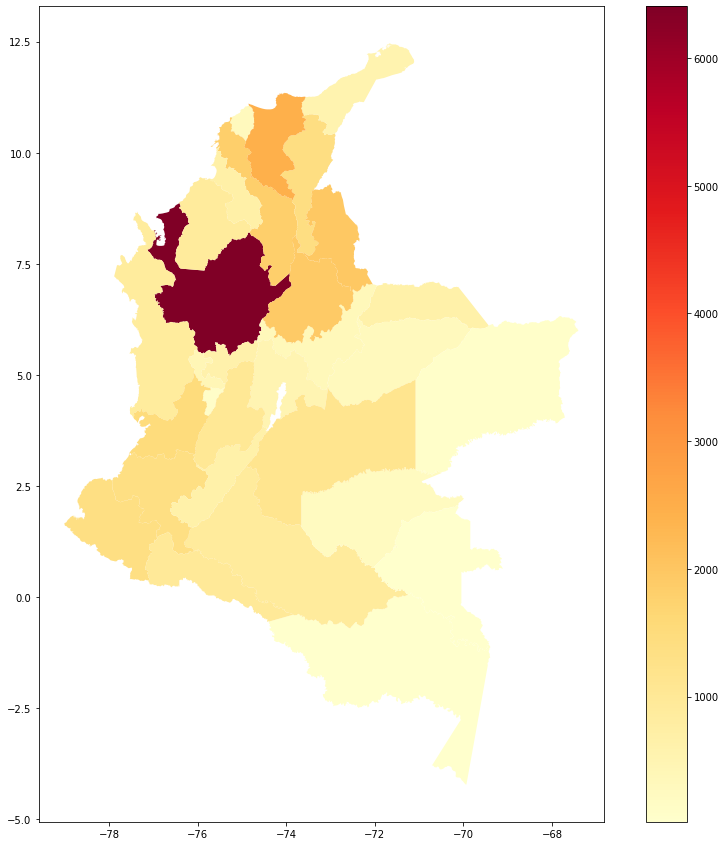

In [ ]:
col_deps = gpd.read_file(r"shapes/Limite Departamental.shp")  # Departamentos
col_deps[["COD_DEPART"]] = col_deps[["COD_DEPART"]].astype(int)
col_deps["Nombre"] = col_deps["Nombre"].str.upper().str.title()

groupedbyDepartment = df.groupby(['Departamento'],as_index = False).size()

departmentGeometry = pd.merge(groupedbyDepartment, col_deps,left_on="Departamento",right_on="Nombre")
departmentGeometry.head()

geopandasMap = gpd.GeoDataFrame(departmentGeometry)

geopandasMap.plot(column = "size",cmap='YlOrRd',legend = True,figsize = (15,15))

# Departamento Amazonas

In [ ]:
df_temp = violencia[violencia['Departamento'] == 'Amazonas']
print(' El año promedio donde se registraron victimas fue {} \n El mes del año promedio en donde se registraron victimas fue {}\n El dia promedio donde se registraron más victimas fue {}\n Este departamento tiene mayor probabilidad de sufrir {}\n El total de victimas fue {}'.format(int(df_temp.Año.mean()),int(df_temp.Mes.mean()),int(df_temp.Día.mean()),0,df_temp['Total de Víctimas del Caso'].count()))


 El año promedio donde se registraron victimas fue 2006 
 El mes del año promedio en donde se registraron victimas fue 7
 El dia promedio donde se registraron más victimas fue 17
 Este departamento tiene mayor probabilidad de sufrir 0
 El total de victimas fue 10


# Departamento Antioquia

In [ ]:
df_temp = violencia[violencia['Departamento'] == 'Antioquia']
print(' El año promedio donde se registraron victimas fue {} \n El mes del año promedio en donde se registraron victimas fue {}\n El dia promedio donde se registraron más victimas fue {}\n Este departamento tiene mayor probabilidad de sufrir {}\n El total de victimas fue {}'.format(int(df_temp.Año.mean()),int(df_temp.Mes.mean()),int(df_temp.Día.mean()),0,df_temp['Total de Víctimas del Caso'].count()))


 El año promedio donde se registraron victimas fue 1926 
 El mes del año promedio en donde se registraron victimas fue 5
 El dia promedio donde se registraron más victimas fue 12
 Este departamento tiene mayor probabilidad de sufrir 0
 El total de victimas fue 2957


# Departamento Arauca

In [ ]:
df_temp = violencia[violencia['Departamento'] == 'Arauca']
print(' El año promedio donde se registraron victimas fue {} \n El mes del año promedio en donde se registraron victimas fue {}\n El dia promedio donde se registraron más victimas fue {}\n Este departamento tiene mayor probabilidad de sufrir {}\n El total de victimas fue {}'.format(int(df_temp.Año.mean()),int(df_temp.Mes.mean()),int(df_temp.Día.mean()),0,df_temp['Total de Víctimas del Caso'].count()))


 El año promedio donde se registraron victimas fue 1916 
 El mes del año promedio en donde se registraron victimas fue 5
 El dia promedio donde se registraron más victimas fue 10
 Este departamento tiene mayor probabilidad de sufrir 0
 El total de victimas fue 161


# Departamento Atlántico

In [ ]:
df_temp = violencia[violencia['Departamento'] == 'Atlantico']
print(' El año promedio donde se registraron victimas fue {} \n El mes del año promedio en donde se registraron victimas fue {}\n El dia promedio donde se registraron más victimas fue {}\n Este departamento tiene mayor probabilidad de sufrir {}\n El total de victimas fue {}'.format(int(df_temp.Año.mean()),int(df_temp.Mes.mean()),int(df_temp.Día.mean()),0,df_temp['Total de Víctimas del Caso'].count()))


 El año promedio donde se registraron victimas fue 1815 
 El mes del año promedio en donde se registraron victimas fue 5
 El dia promedio donde se registraron más victimas fue 12
 Este departamento tiene mayor probabilidad de sufrir 0
 El total de victimas fue 53


# Departamento Bogotá

In [ ]:
df_temp = violencia[violencia['Departamento'] == 'Bogota, D. C.']
print(' El año promedio donde se registraron victimas fue {} \n El mes del año promedio en donde se registraron victimas fue {}\n El dia promedio donde se registraron más victimas fue {}\n Este departamento tiene mayor probabilidad de sufrir {}\n El total de victimas fue {}'.format(int(df_temp.Año.mean()),int(df_temp.Mes.mean()),int(df_temp.Día.mean()),0,df_temp['Total de Víctimas del Caso'].count()))


 El año promedio donde se registraron victimas fue 1663 
 El mes del año promedio en donde se registraron victimas fue 5
 El dia promedio donde se registraron más victimas fue 11
 Este departamento tiene mayor probabilidad de sufrir 0
 El total de victimas fue 94


# Departamento Bolívar

In [ ]:
df_temp = violencia[violencia['Departamento'] == 'Bolivar']
print(' El año promedio donde se registraron victimas fue {} \n El mes del año promedio en donde se registraron victimas fue {}\n El dia promedio donde se registraron más victimas fue {}\n Este departamento tiene mayor probabilidad de sufrir {}\n El total de victimas fue {}'.format(int(df_temp.Año.mean()),int(df_temp.Mes.mean()),int(df_temp.Día.mean()),0,df_temp['Total de Víctimas del Caso'].count()))


 El año promedio donde se registraron victimas fue 1972 
 El mes del año promedio en donde se registraron victimas fue 5
 El dia promedio donde se registraron más victimas fue 13
 Este departamento tiene mayor probabilidad de sufrir 0
 El total de victimas fue 943


# Departamento Boyacá

In [ ]:
df_temp = violencia[violencia['Departamento'] == 'Boyaca']
print(' El año promedio donde se registraron victimas fue {} \n El mes del año promedio en donde se registraron victimas fue {}\n El dia promedio donde se registraron más victimas fue {}\n Este departamento tiene mayor probabilidad de sufrir {}\n El total de victimas fue {}'.format(int(df_temp.Año.mean()),int(df_temp.Mes.mean()),int(df_temp.Día.mean()),0,df_temp['Total de Víctimas del Caso'].count()))


 El año promedio donde se registraron victimas fue 1961 
 El mes del año promedio en donde se registraron victimas fue 5
 El dia promedio donde se registraron más victimas fue 11
 Este departamento tiene mayor probabilidad de sufrir 0
 El total de victimas fue 105


# Departamento Caldas

In [ ]:
df_temp = violencia[violencia['Departamento'] == 'Caldas']
print(' El año promedio donde se registraron victimas fue {} \n El mes del año promedio en donde se registraron victimas fue {}\n El dia promedio donde se registraron más victimas fue {}\n Este departamento tiene mayor probabilidad de sufrir {}\n El total de victimas fue {}'.format(int(df_temp.Año.mean()),int(df_temp.Mes.mean()),int(df_temp.Día.mean()),0,df_temp['Total de Víctimas del Caso'].count()))


 El año promedio donde se registraron victimas fue 1958 
 El mes del año promedio en donde se registraron victimas fue 6
 El dia promedio donde se registraron más victimas fue 10
 Este departamento tiene mayor probabilidad de sufrir 0
 El total de victimas fue 179


# Departamento Caquetá

In [ ]:
df_temp = violencia[violencia['Departamento'] == 'Caqueta']
print(' El año promedio donde se registraron victimas fue {} \n El mes del año promedio en donde se registraron victimas fue {}\n El dia promedio donde se registraron más victimas fue {}\n Este departamento tiene mayor probabilidad de sufrir {}\n El total de victimas fue {}'.format(int(df_temp.Año.mean()),int(df_temp.Mes.mean()),int(df_temp.Día.mean()),0,df_temp['Total de Víctimas del Caso'].count()))


 El año promedio donde se registraron victimas fue 1927 
 El mes del año promedio en donde se registraron victimas fue 6
 El dia promedio donde se registraron más victimas fue 13
 Este departamento tiene mayor probabilidad de sufrir 0
 El total de victimas fue 663


# Departamento Casanare

In [ ]:
df_temp = violencia[violencia['Departamento'] == 'Casanare']
print(' El año promedio donde se registraron victimas fue {} \n El mes del año promedio en donde se registraron victimas fue {}\n El dia promedio donde se registraron más victimas fue {}\n Este departamento tiene mayor probabilidad de sufrir {}\n El total de victimas fue {}'.format(int(df_temp.Año.mean()),int(df_temp.Mes.mean()),int(df_temp.Día.mean()),0,df_temp['Total de Víctimas del Caso'].count()))


 El año promedio donde se registraron victimas fue 1942 
 El mes del año promedio en donde se registraron victimas fue 5
 El dia promedio donde se registraron más victimas fue 10
 Este departamento tiene mayor probabilidad de sufrir 0
 El total de victimas fue 171


# Departamento Cauca

In [ ]:
df_temp = violencia[violencia['Departamento'] == 'Cauca']
print(' El año promedio donde se registraron victimas fue {} \n El mes del año promedio en donde se registraron victimas fue {}\n El dia promedio donde se registraron más victimas fue {}\n Este departamento tiene mayor probabilidad de sufrir {}\n El total de victimas fue {}'.format(int(df_temp.Año.mean()),int(df_temp.Mes.mean()),int(df_temp.Día.mean()),0,df_temp['Total de Víctimas del Caso'].count()))


 El año promedio donde se registraron victimas fue 1954 
 El mes del año promedio en donde se registraron victimas fue 6
 El dia promedio donde se registraron más victimas fue 10
 Este departamento tiene mayor probabilidad de sufrir 0
 El total de victimas fue 713


# Departamento Cesar

In [ ]:
df_temp = violencia[violencia['Departamento'] == 'Cesar']
print(' El año promedio donde se registraron victimas fue {} \n El mes del año promedio en donde se registraron victimas fue {}\n El dia promedio donde se registraron más victimas fue {}\n Este departamento tiene mayor probabilidad de sufrir {}\n El total de victimas fue {}'.format(int(df_temp.Año.mean()),int(df_temp.Mes.mean()),int(df_temp.Día.mean()),0,df_temp['Total de Víctimas del Caso'].count()))


 El año promedio donde se registraron victimas fue 1943 
 El mes del año promedio en donde se registraron victimas fue 5
 El dia promedio donde se registraron más victimas fue 13
 Este departamento tiene mayor probabilidad de sufrir 0
 El total de victimas fue 512


# Departamento Chocó

In [ ]:
df_temp = violencia[violencia['Departamento'] == 'Choco']
print(' El año promedio donde se registraron victimas fue {} \n El mes del año promedio en donde se registraron victimas fue {}\n El dia promedio donde se registraron más victimas fue {}\n Este departamento tiene mayor probabilidad de sufrir {}\n El total de victimas fue {}'.format(int(df_temp.Año.mean()),int(df_temp.Mes.mean()),int(df_temp.Día.mean()),0,df_temp['Total de Víctimas del Caso'].count()))


 El año promedio donde se registraron victimas fue 1980 
 El mes del año promedio en donde se registraron victimas fue 5
 El dia promedio donde se registraron más victimas fue 12
 Este departamento tiene mayor probabilidad de sufrir 0
 El total de victimas fue 560


# Departamento Córdoba

In [ ]:
df_temp = violencia[violencia['Departamento'] == 'Cordoba']
print(' El año promedio donde se registraron victimas fue {} \n El mes del año promedio en donde se registraron victimas fue {}\n El dia promedio donde se registraron más victimas fue {}\n Este departamento tiene mayor probabilidad de sufrir {}\n El total de victimas fue {}'.format(int(df_temp.Año.mean()),int(df_temp.Mes.mean()),int(df_temp.Día.mean()),0,df_temp['Total de Víctimas del Caso'].count()))


 El año promedio donde se registraron victimas fue 1958 
 El mes del año promedio en donde se registraron victimas fue 6
 El dia promedio donde se registraron más victimas fue 12
 Este departamento tiene mayor probabilidad de sufrir 0
 El total de victimas fue 318


# Departamento Cundinamarca

In [ ]:
df_temp = violencia[violencia['Departamento'] == 'Cundinamarca']
print(' El año promedio donde se registraron victimas fue {} \n El mes del año promedio en donde se registraron victimas fue {}\n El dia promedio donde se registraron más victimas fue {}\n Este departamento tiene mayor probabilidad de sufrir {}\n El total de victimas fue {}'.format(int(df_temp.Año.mean()),int(df_temp.Mes.mean()),int(df_temp.Día.mean()),0,df_temp['Total de Víctimas del Caso'].count()))


 El año promedio donde se registraron victimas fue 1898 
 El mes del año promedio en donde se registraron victimas fue 5
 El dia promedio donde se registraron más victimas fue 11
 Este departamento tiene mayor probabilidad de sufrir 0
 El total de victimas fue 218


# Departamento Guainía 

In [ ]:
df_temp = violencia[violencia['Departamento'] == 'Guainia']
print(' El año promedio donde se registraron victimas fue {} \n El mes del año promedio en donde se registraron victimas fue {}\n El dia promedio donde se registraron más victimas fue {}\n Este departamento tiene mayor probabilidad de sufrir {}\n El total de victimas fue {}'.format(int(df_temp.Año.mean()),int(df_temp.Mes.mean()),int(df_temp.Día.mean()),0,df_temp['Total de Víctimas del Caso'].count()))


 El año promedio donde se registraron victimas fue 2001 
 El mes del año promedio en donde se registraron victimas fue 4
 El dia promedio donde se registraron más victimas fue 11
 Este departamento tiene mayor probabilidad de sufrir 0
 El total de victimas fue 2


# Departamento Guaviare

In [ ]:
df_temp = violencia[violencia['Departamento'] == 'Guaviare']
print(' El año promedio donde se registraron victimas fue {} \n El mes del año promedio en donde se registraron victimas fue {}\n El dia promedio donde se registraron más victimas fue {}\n Este departamento tiene mayor probabilidad de sufrir {}\n El total de victimas fue {}'.format(int(df_temp.Año.mean()),int(df_temp.Mes.mean()),int(df_temp.Día.mean()),0,df_temp['Total de Víctimas del Caso'].count()))


 El año promedio donde se registraron victimas fue 1956 
 El mes del año promedio en donde se registraron victimas fue 5
 El dia promedio donde se registraron más victimas fue 11
 Este departamento tiene mayor probabilidad de sufrir 0
 El total de victimas fue 128


# Departamento Huila

In [ ]:
df_temp = violencia[violencia['Departamento'] == 'Huila']
print(' El año promedio donde se registraron victimas fue {} \n El mes del año promedio en donde se registraron victimas fue {}\n El dia promedio donde se registraron más victimas fue {}\n Este departamento tiene mayor probabilidad de sufrir {}\n El total de victimas fue {}'.format(int(df_temp.Año.mean()),int(df_temp.Mes.mean()),int(df_temp.Día.mean()),0,df_temp['Total de Víctimas del Caso'].count()))


 El año promedio donde se registraron victimas fue 1908 
 El mes del año promedio en donde se registraron victimas fue 6
 El dia promedio donde se registraron más victimas fue 12
 Este departamento tiene mayor probabilidad de sufrir 0
 El total de victimas fue 185


# Departamento La Guajira

In [ ]:
df_temp = violencia[violencia['Departamento'] == 'Guajira']
print(' El año promedio donde se registraron victimas fue {} \n El mes del año promedio en donde se registraron victimas fue {}\n El dia promedio donde se registraron más victimas fue {}\n Este departamento tiene mayor probabilidad de sufrir {}\n El total de victimas fue {}'.format(int(df_temp.Año.mean()),int(df_temp.Mes.mean()),int(df_temp.Día.mean()),0,df_temp['Total de Víctimas del Caso'].count()))


# Departamento Magdalena

In [ ]:
df_temp = violencia[violencia['Departamento'] == 'Magdalena']
print(' El año promedio donde se registraron victimas fue {} \n El mes del año promedio en donde se registraron victimas fue {}\n El dia promedio donde se registraron más victimas fue {}\n Este departamento tiene mayor probabilidad de sufrir {}\n El total de victimas fue {}'.format(int(df_temp.Año.mean()),int(df_temp.Mes.mean()),int(df_temp.Día.mean()),0,df_temp['Total de Víctimas del Caso'].count()))


 El año promedio donde se registraron victimas fue 1976 
 El mes del año promedio en donde se registraron victimas fue 6
 El dia promedio donde se registraron más victimas fue 14
 Este departamento tiene mayor probabilidad de sufrir 0
 El total de victimas fue 1772


# Departamento Meta

In [ ]:
df_temp = violencia[violencia['Departamento'] == 'Meta']
print(' El año promedio donde se registraron victimas fue {} \n El mes del año promedio en donde se registraron victimas fue {}\n El dia promedio donde se registraron más victimas fue {}\n Este departamento tiene mayor probabilidad de sufrir {}\n El total de victimas fue {}'.format(int(df_temp.Año.mean()),int(df_temp.Mes.mean()),int(df_temp.Día.mean()),0,df_temp['Total de Víctimas del Caso'].count()))


 El año promedio donde se registraron victimas fue 1892 
 El mes del año promedio en donde se registraron victimas fue 5
 El dia promedio donde se registraron más victimas fue 11
 Este departamento tiene mayor probabilidad de sufrir 0
 El total de victimas fue 419


# Departamento Nariño

In [ ]:
df_temp = violencia[violencia['Departamento'] == 'Nariño']
print(' El año promedio donde se registraron victimas fue {} \n El mes del año promedio en donde se registraron victimas fue {}\n El dia promedio donde se registraron más victimas fue {}\n Este departamento tiene mayor probabilidad de sufrir {}\n El total de victimas fue {}'.format(int(df_temp.Año.mean()),int(df_temp.Mes.mean()),int(df_temp.Día.mean()),0,df_temp['Total de Víctimas del Caso'].count()))


 El año promedio donde se registraron victimas fue 1977 
 El mes del año promedio en donde se registraron victimas fue 6
 El dia promedio donde se registraron más victimas fue 12
 Este departamento tiene mayor probabilidad de sufrir 0
 El total de victimas fue 1030


# Departamento Norte de Santander

In [ ]:
df_temp = violencia[violencia['Departamento'] == 'Santander']
print(' El año promedio donde se registraron victimas fue {} \n El mes del año promedio en donde se registraron victimas fue {}\n El dia promedio donde se registraron más victimas fue {}\n Este departamento tiene mayor probabilidad de sufrir {}\n El total de victimas fue {}'.format(int(df_temp.Año.mean()),int(df_temp.Mes.mean()),int(df_temp.Día.mean()),0,df_temp['Total de Víctimas del Caso'].count()))


 El año promedio donde se registraron victimas fue 1905 
 El mes del año promedio en donde se registraron victimas fue 5
 El dia promedio donde se registraron más victimas fue 9
 Este departamento tiene mayor probabilidad de sufrir 0
 El total de victimas fue 428


# Departamento Putumayo

In [ ]:
df_temp = violencia[violencia['Departamento'] == 'Putumayo']
print(' El año promedio donde se registraron victimas fue {} \n El mes del año promedio en donde se registraron victimas fue {}\n El dia promedio donde se registraron más victimas fue {}\n Este departamento tiene mayor probabilidad de sufrir {}\n El total de victimas fue {}'.format(int(df_temp.Año.mean()),int(df_temp.Mes.mean()),int(df_temp.Día.mean()),0,df_temp['Total de Víctimas del Caso'].count()))


 El año promedio donde se registraron victimas fue 1955 
 El mes del año promedio en donde se registraron victimas fue 5
 El dia promedio donde se registraron más victimas fue 12
 Este departamento tiene mayor probabilidad de sufrir 0
 El total de victimas fue 841


# Departamento Quindío

In [ ]:
df_temp = violencia[violencia['Departamento'] == 'Quindio']
print(' El año promedio donde se registraron victimas fue {} \n El mes del año promedio en donde se registraron victimas fue {}\n El dia promedio donde se registraron más victimas fue {}\n Este departamento tiene mayor probabilidad de sufrir {}\n El total de victimas fue {}'.format(int(df_temp.Año.mean()),int(df_temp.Mes.mean()),int(df_temp.Día.mean()),0,df_temp['Total de Víctimas del Caso'].count()))


 El año promedio donde se registraron victimas fue 1895 
 El mes del año promedio en donde se registraron victimas fue 5
 El dia promedio donde se registraron más victimas fue 11
 Este departamento tiene mayor probabilidad de sufrir 0
 El total de victimas fue 37


# Departamento Risaralda

In [ ]:
df_temp = violencia[violencia['Departamento'] == 'Risaralda']
print(' El año promedio donde se registraron victimas fue {} \n El mes del año promedio en donde se registraron victimas fue {}\n El dia promedio donde se registraron más victimas fue {}\n Este departamento tiene mayor probabilidad de sufrir {}\n El total de victimas fue {}'.format(int(df_temp.Año.mean()),int(df_temp.Mes.mean()),int(df_temp.Día.mean()),0,df_temp['Total de Víctimas del Caso'].count()))


 El año promedio donde se registraron victimas fue 1926 
 El mes del año promedio en donde se registraron victimas fue 5
 El dia promedio donde se registraron más victimas fue 10
 Este departamento tiene mayor probabilidad de sufrir 0
 El total de victimas fue 134


# Departamento San Andrés y Providencia 

In [ ]:
df_temp = violencia[violencia['Departamento'] == 'Archipielago De San Andres, Providencia Y Santa Catalina']
print(' El año promedio donde se registraron victimas fue {} \n El mes del año promedio en donde se registraron victimas fue {}\n El dia promedio donde se registraron más victimas fue {}\n Este departamento tiene mayor probabilidad de sufrir {}\n El total de victimas fue {}'.format(int(df_temp.Año.mean()),int(df_temp.Mes.mean()),int(df_temp.Día.mean()),0,df_temp['Total de Víctimas del Caso'].count()))


 El año promedio donde se registraron victimas fue 1974 
 El mes del año promedio en donde se registraron victimas fue 6
 El dia promedio donde se registraron más victimas fue 9
 Este departamento tiene mayor probabilidad de sufrir 0
 El total de victimas fue 1


# Departamento Santander

In [ ]:
df_temp = violencia[violencia['Departamento'] == 'Santander']
print(' El año promedio donde se registraron victimas fue {} \n El mes del año promedio en donde se registraron victimas fue {}\n El dia promedio donde se registraron más victimas fue {}\n Este departamento tiene mayor probabilidad de sufrir {}\n El total de victimas fue {}'.format(int(df_temp.Año.mean()),int(df_temp.Mes.mean()),int(df_temp.Día.mean()),0,df_temp['Total de Víctimas del Caso'].count()))


 El año promedio donde se registraron victimas fue 1905 
 El mes del año promedio en donde se registraron victimas fue 5
 El dia promedio donde se registraron más victimas fue 9
 Este departamento tiene mayor probabilidad de sufrir 0
 El total de victimas fue 428


# Departamento Sucre

In [ ]:
df_temp = violencia[violencia['Departamento'] == 'Sucre']
print(' El año promedio donde se registraron victimas fue {} \n El mes del año promedio en donde se registraron victimas fue {}\n El dia promedio donde se registraron más victimas fue {}\n Este departamento tiene mayor probabilidad de sufrir {}\n El total de victimas fue {}'.format(int(df_temp.Año.mean()),int(df_temp.Mes.mean()),int(df_temp.Día.mean()),0,df_temp['Total de Víctimas del Caso'].count()))


 El año promedio donde se registraron victimas fue 1922 
 El mes del año promedio en donde se registraron victimas fue 5
 El dia promedio donde se registraron más victimas fue 13
 Este departamento tiene mayor probabilidad de sufrir 0
 El total de victimas fue 304


# Departamento Tolima

In [ ]:
df_temp = violencia[violencia['Departamento'] == 'Tolima']
print(' El año promedio donde se registraron victimas fue {} \n El mes del año promedio en donde se registraron victimas fue {}\n El dia promedio donde se registraron más victimas fue {}\n Este departamento tiene mayor probabilidad de sufrir {}\n El total de victimas fue {}'.format(int(df_temp.Año.mean()),int(df_temp.Mes.mean()),int(df_temp.Día.mean()),0,df_temp['Total de Víctimas del Caso'].count()))


 El año promedio donde se registraron victimas fue 1946 
 El mes del año promedio en donde se registraron victimas fue 5
 El dia promedio donde se registraron más victimas fue 11
 Este departamento tiene mayor probabilidad de sufrir 0
 El total de victimas fue 417


# Departamento Valle del Cauca

In [ ]:
df_temp = violencia[violencia['Departamento'] == 'Valle Del Cauca']
print(' El año promedio donde se registraron victimas fue {} \n El mes del año promedio en donde se registraron victimas fue {}\n El dia promedio donde se registraron más victimas fue {}\n Este departamento tiene mayor probabilidad de sufrir {}\n El total de victimas fue {}'.format(int(df_temp.Año.mean()),int(df_temp.Mes.mean()),int(df_temp.Día.mean()),0,df_temp['Total de Víctimas del Caso'].count()))


 El año promedio donde se registraron victimas fue 1935 
 El mes del año promedio en donde se registraron victimas fue 5
 El dia promedio donde se registraron más victimas fue 12
 Este departamento tiene mayor probabilidad de sufrir 0
 El total de victimas fue 697


# Departamento Vaupés

In [ ]:
df_temp = violencia[violencia['Departamento'] == 'Vaupes']
print(' El año promedio donde se registraron victimas fue {} \n El mes del año promedio en donde se registraron victimas fue {}\n El dia promedio donde se registraron más victimas fue {}\n Este departamento tiene mayor probabilidad de sufrir {}\n El total de victimas fue {}'.format(int(df_temp.Año.mean()),int(df_temp.Mes.mean()),int(df_temp.Día.mean()),0,df_temp['Total de Víctimas del Caso'].count()))


 El año promedio donde se registraron victimas fue 2002 
 El mes del año promedio en donde se registraron victimas fue 6
 El dia promedio donde se registraron más victimas fue 10
 Este departamento tiene mayor probabilidad de sufrir 0
 El total de victimas fue 17


# Departamento Vichada

In [ ]:
df_temp = violencia[violencia['Departamento'] == 'Vichada']
print(' El año promedio donde se registraron victimas fue {} \n El mes del año promedio en donde se registraron victimas fue {}\n El dia promedio donde se registraron más victimas fue {}\n Este departamento tiene mayor probabilidad de sufrir {}\n El total de victimas fue {}'.format(int(df_temp.Año.mean()),int(df_temp.Mes.mean()),int(df_temp.Día.mean()),0,df_temp['Total de Víctimas del Caso'].count()))


 El año promedio donde se registraron victimas fue 1972 
 El mes del año promedio en donde se registraron victimas fue 5
 El dia promedio donde se registraron más victimas fue 9
 Este departamento tiene mayor probabilidad de sufrir 0
 El total de victimas fue 63
